#### 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ddos = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
ddos.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.5,17.67767,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
ddos.columns = ddos.columns.str.strip() # removing space before and after columns

In [4]:
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non-null  float64
 13 

#### 2. Preprocessing : removing nan, inf and -inf

a. I go this method online that clean dataframe:

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)  # "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep]

In [5]:
clean_ddos = clean_dataset(ddos)
clean_ddos.Label.value_counts(normalize = True)

DDoS      0.567208
BENIGN    0.432792
Name: Label, dtype: float64

b. I want to create a new column and called it y such that y = 0 if the Label = BENIGN, otherwise y = 1

In [6]:
clean_ddos['y'] = 1

/var/folders/qc/lxgcggjd0nz6d42n4yrv6xfw0000gp/T/ipykernel_4373/505747167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ddos['y'] = 1


In [7]:
clean_ddos.loc[clean_ddos.Label=='BENIGN', 'y'] = 0
clean_ddos

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,y
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


c. 'Fwd Header Length' column appears twice. I deleted one

In [9]:
(clean_ddos['Fwd Header Length'] == clean_ddos['Fwd Header Length.1']).nunique()

1

In [8]:
del clean_ddos['Fwd Header Length.1']

In [11]:
clean_ddos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225711 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225711 non-null  int64  
 1   Flow Duration                225711 non-null  int64  
 2   Total Fwd Packets            225711 non-null  int64  
 3   Total Backward Packets       225711 non-null  int64  
 4   Total Length of Fwd Packets  225711 non-null  int64  
 5   Total Length of Bwd Packets  225711 non-null  int64  
 6   Fwd Packet Length Max        225711 non-null  int64  
 7   Fwd Packet Length Min        225711 non-null  int64  
 8   Fwd Packet Length Mean       225711 non-null  float64
 9   Fwd Packet Length Std        225711 non-null  float64
 10  Bwd Packet Length Max        225711 non-null  int64  
 11  Bwd Packet Length Min        225711 non-null  int64  
 12  Bwd Packet Length Mean       225711 non-null  float64
 13 

#### 3. Train Test Split: I want to set aside 20% of the dataset as the test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
clean_ddos_train, clean_ddos_test = train_test_split(clean_ddos.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.2,
                                              stratify=clean_ddos.y.values)

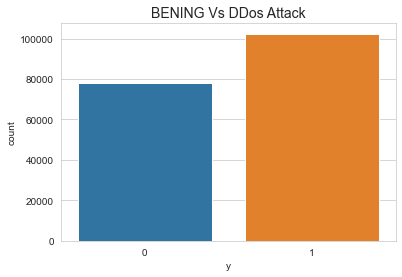

In [41]:
sns.countplot(data = clean_ddos_train, x = clean_ddos_train['y'])
plt.savefig("DDos_balance.jpeg",
            format="jpeg")
plt.title("BENING Vs DDos Attack", fontsize=14)
plt.show()


#### 4. Exploratory Data Analysis (EDA)

I want to plot the histogram of each column for each class '0' and '1' in order to possibly figure out the important feature for prediction 

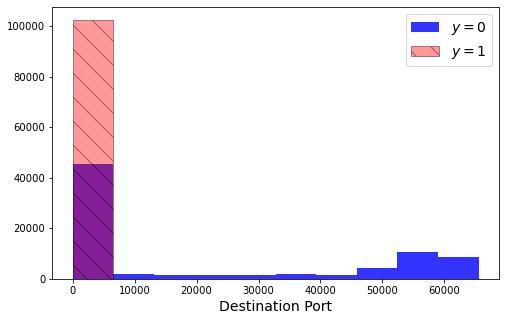

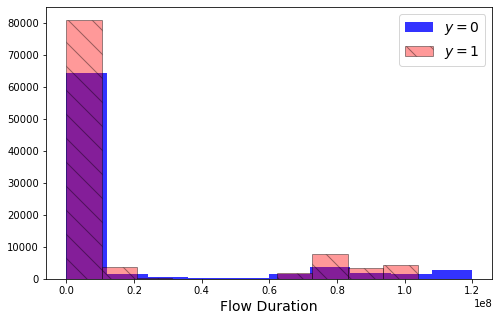

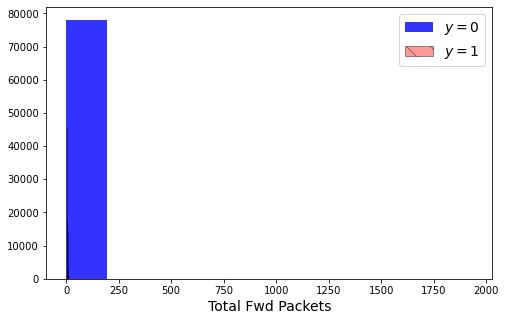

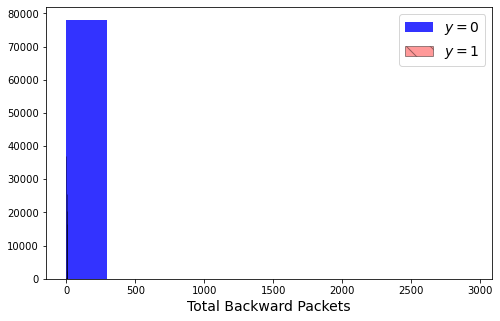

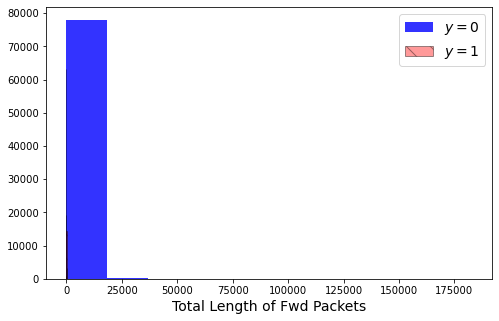

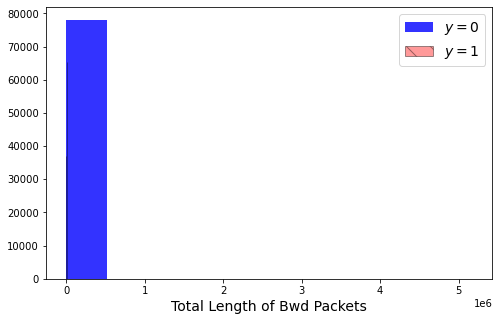

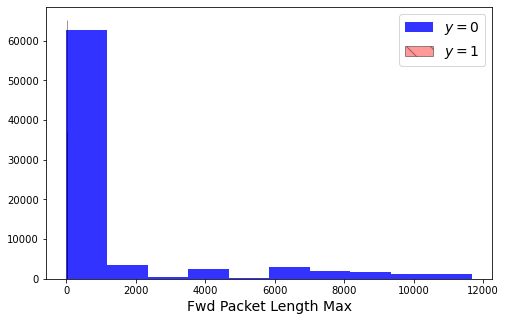

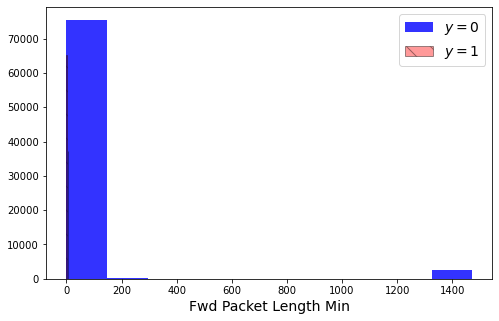

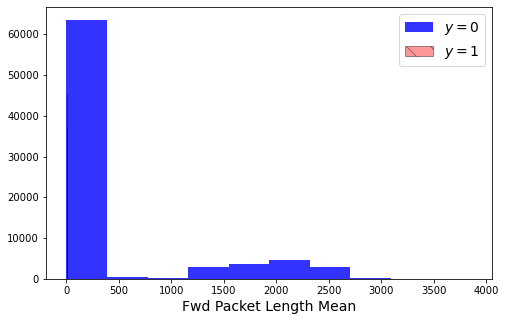

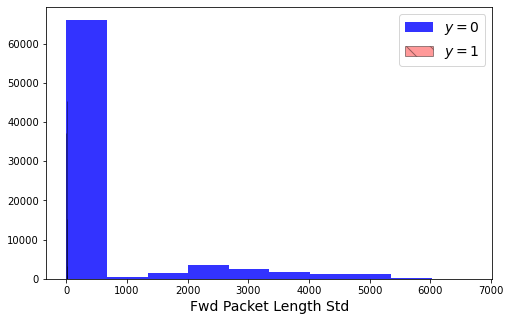

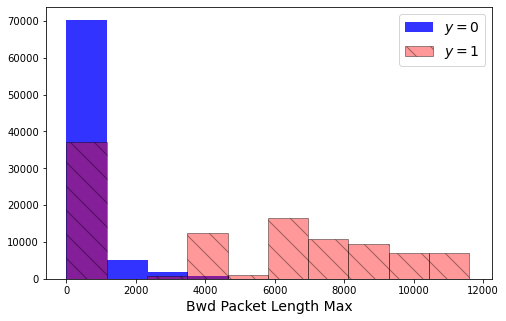

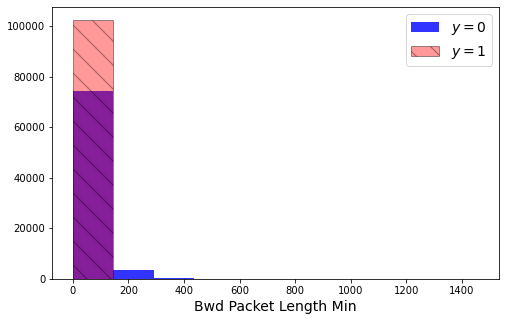

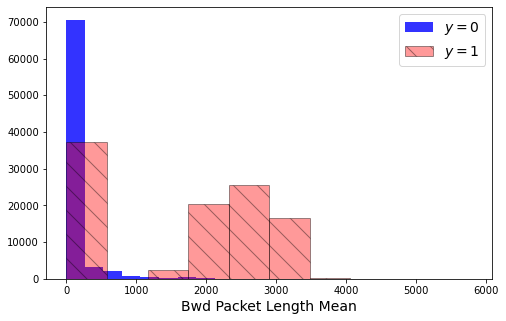

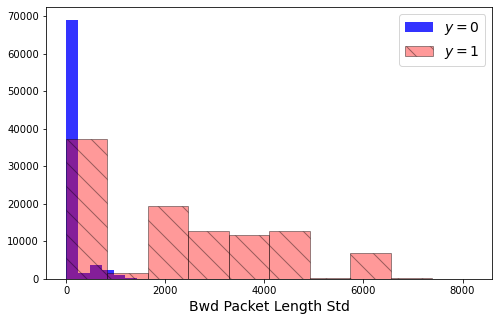

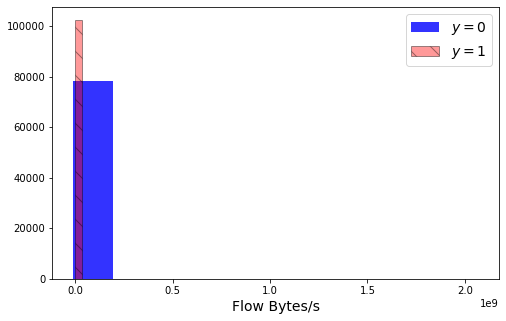

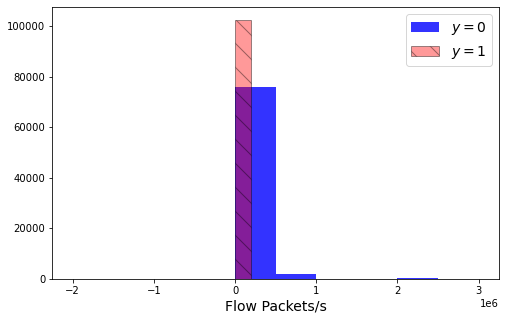

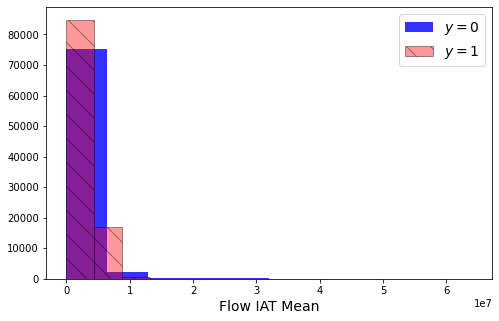

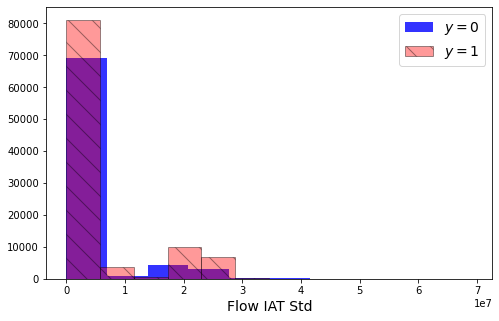

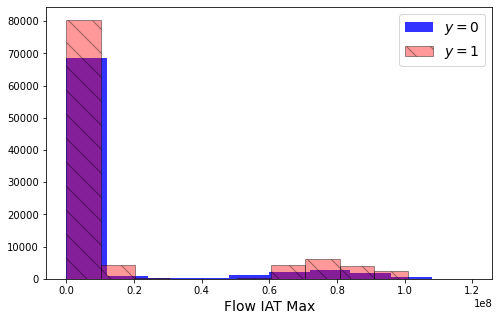

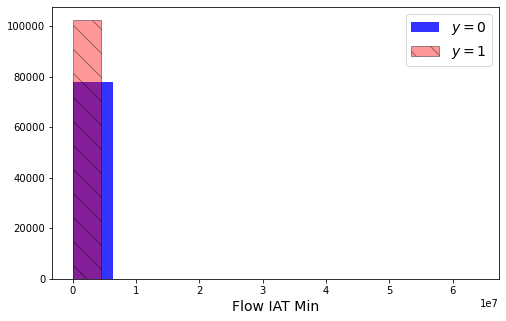

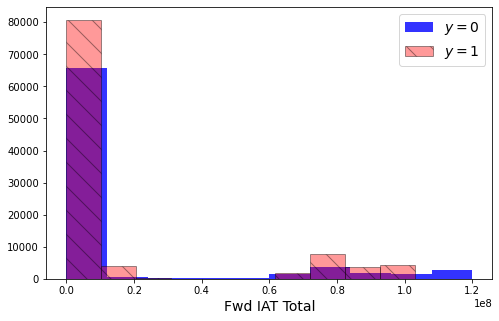

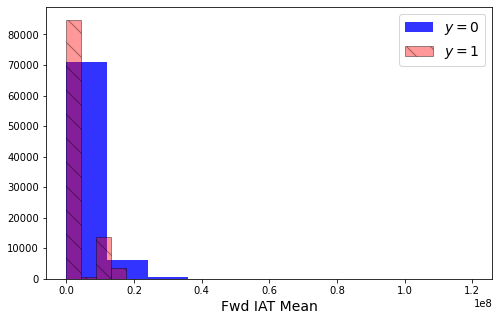

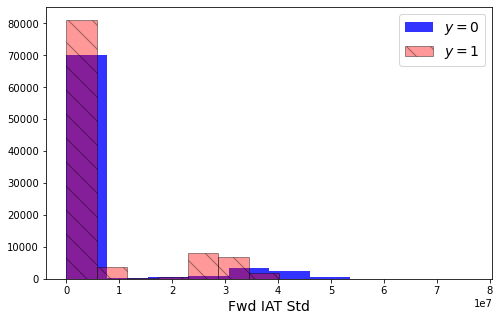

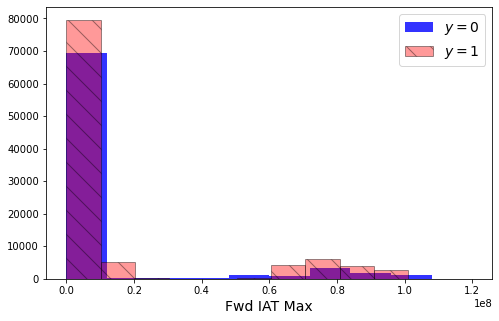

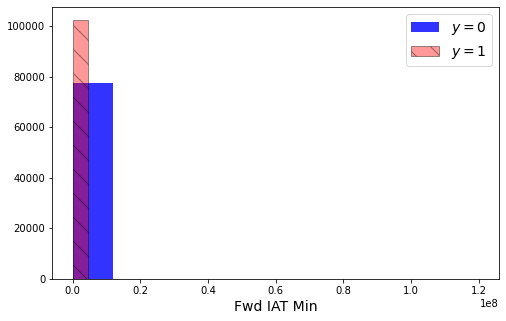

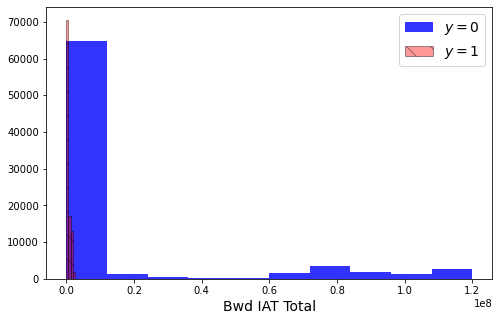

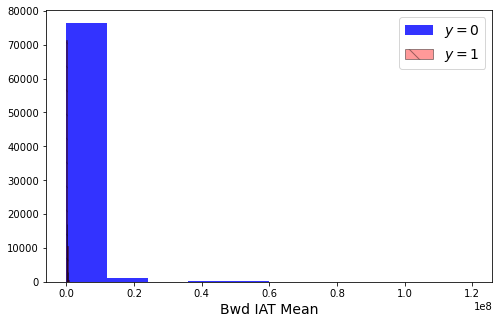

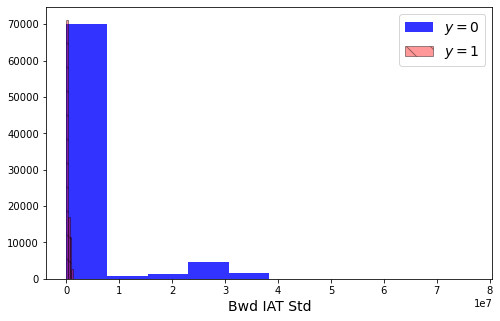

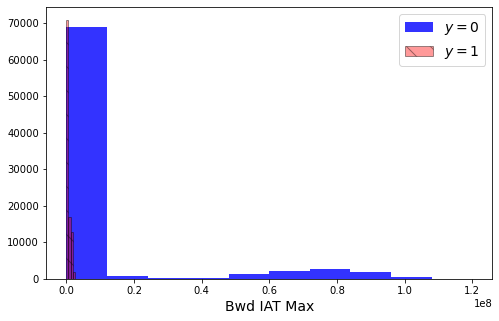

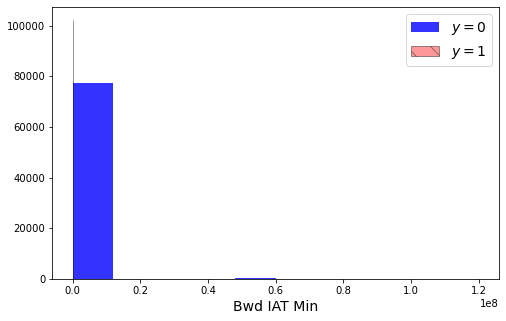

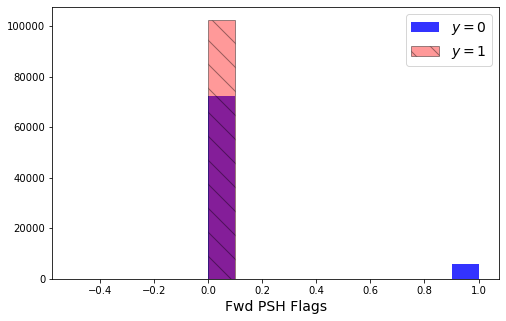

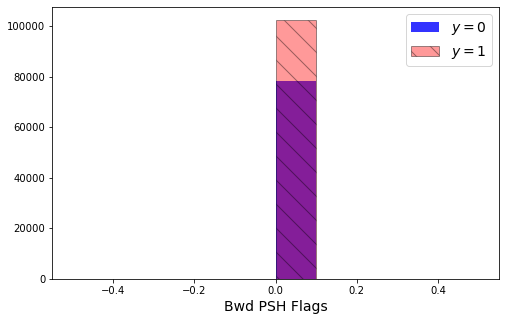

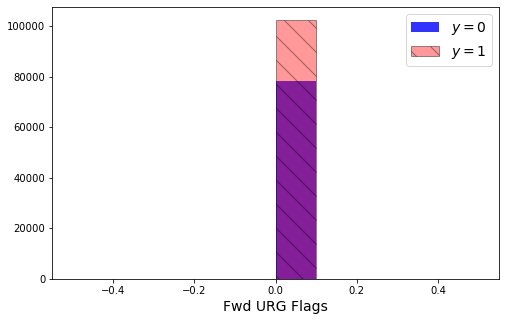

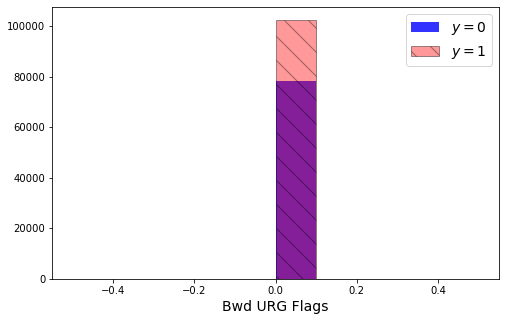

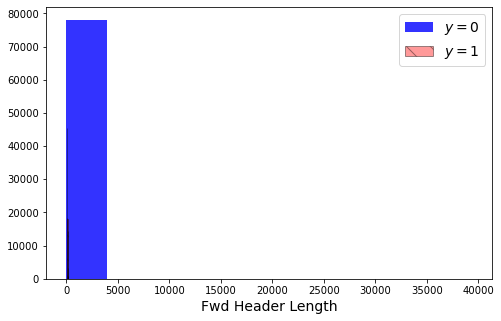

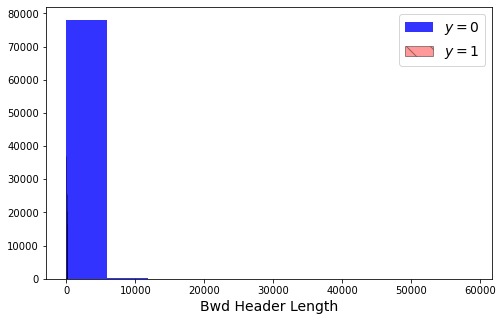

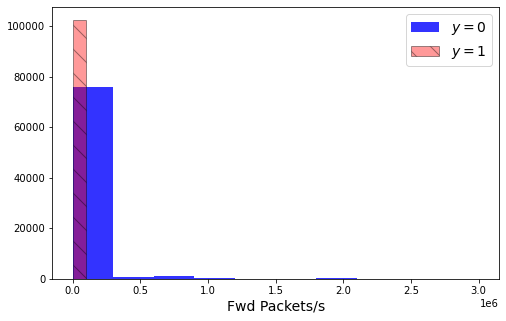

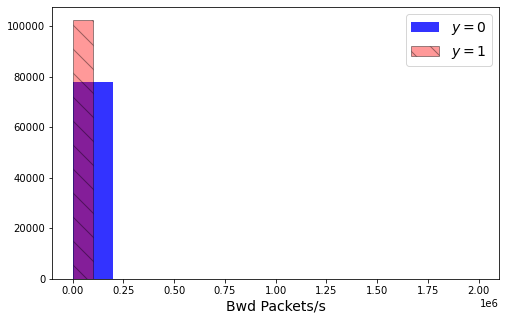

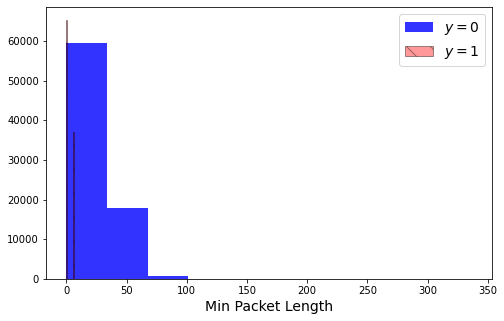

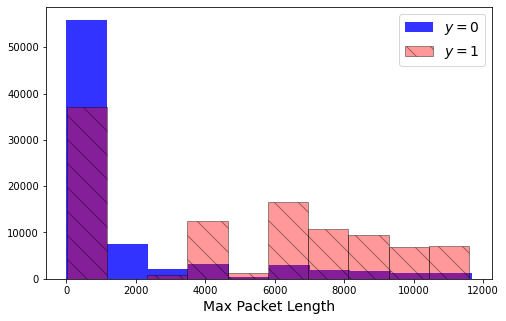

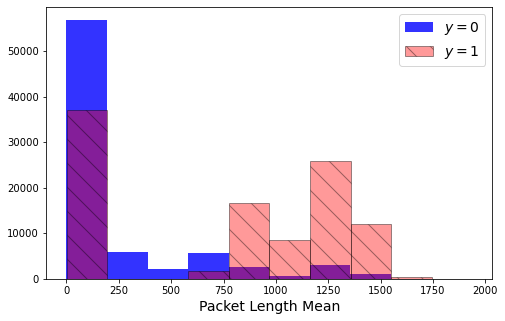

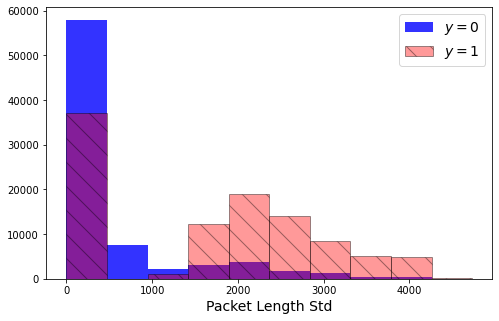

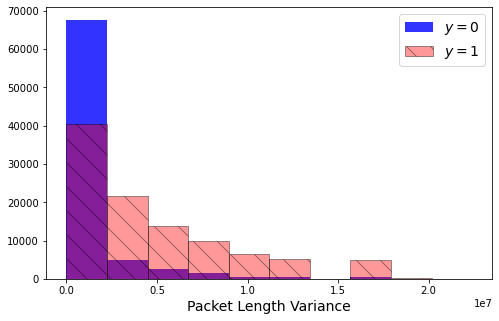

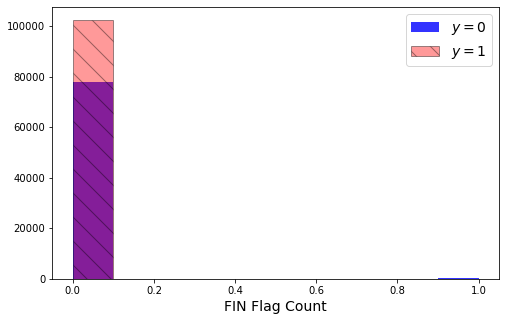

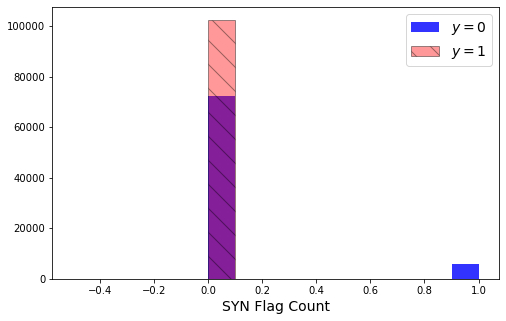

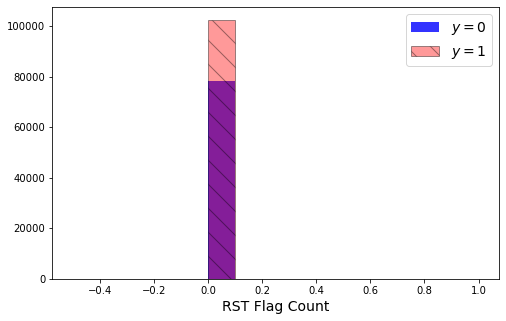

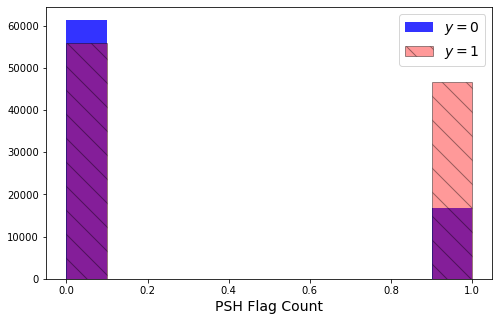

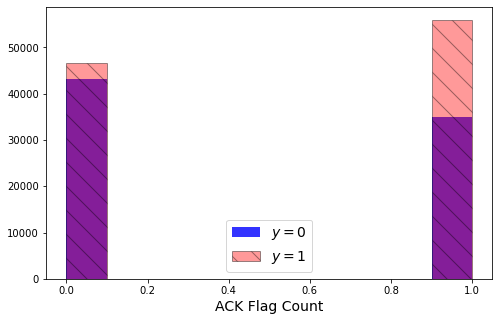

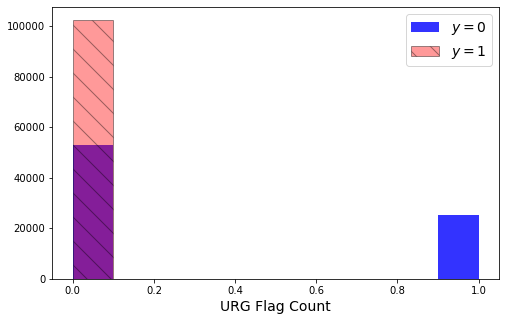

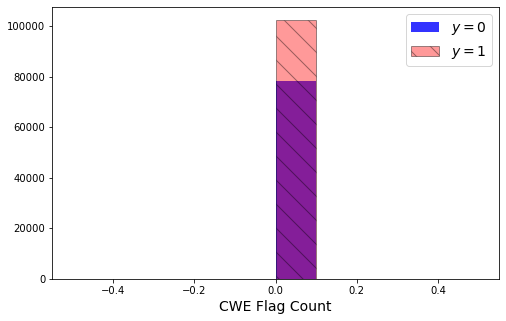

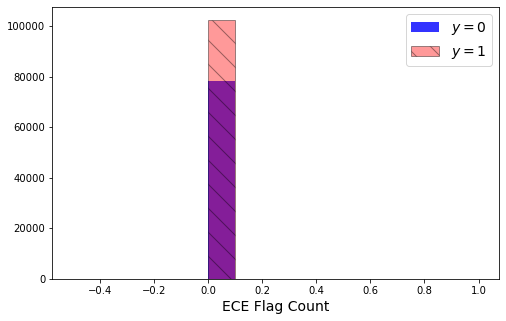

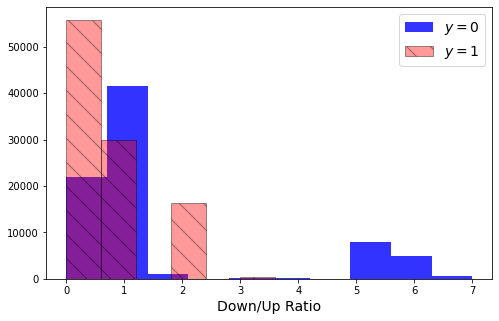

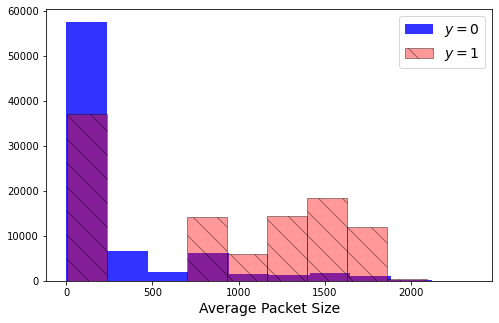

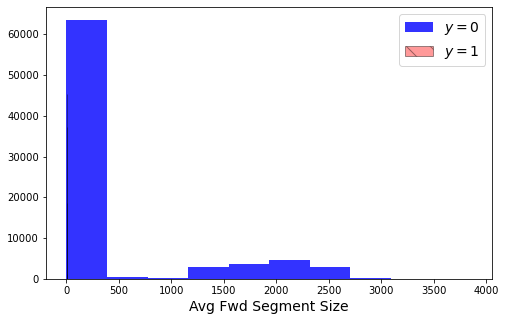

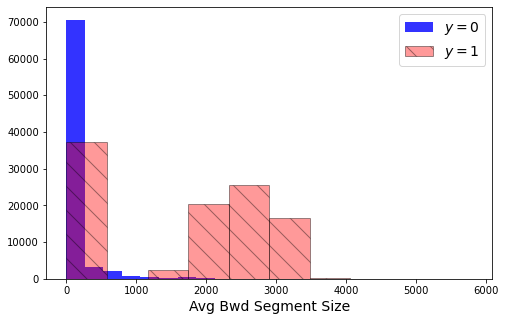

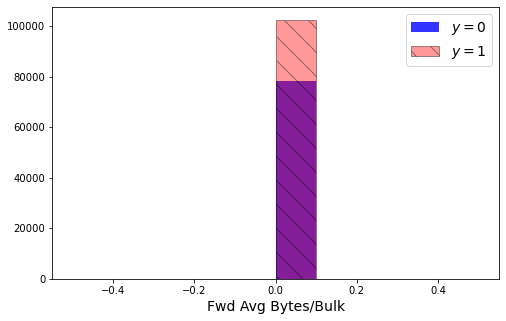

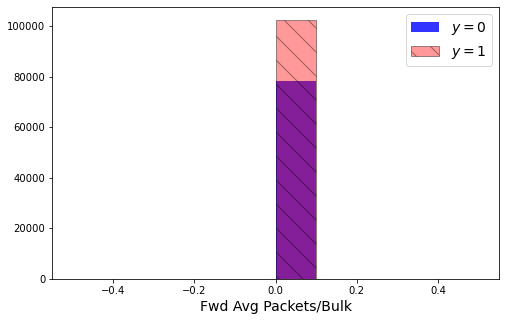

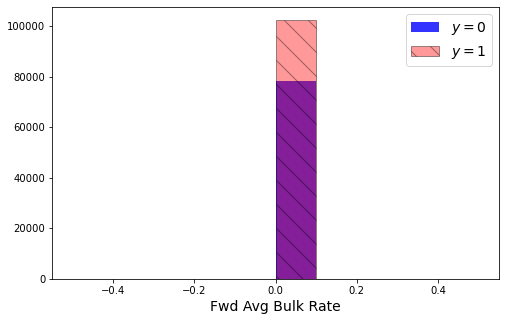

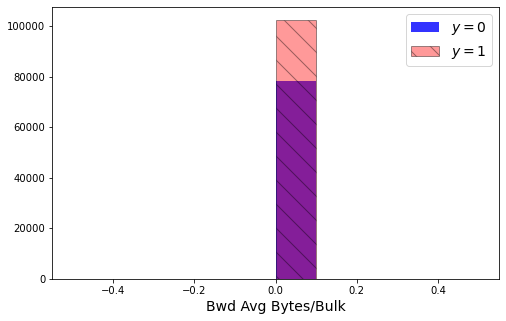

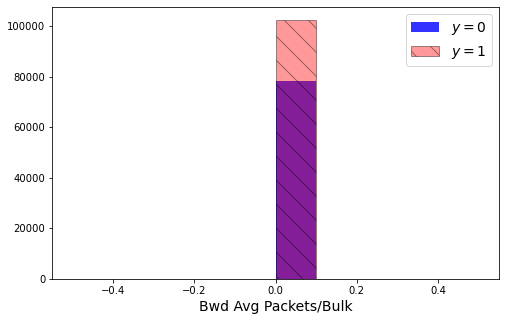

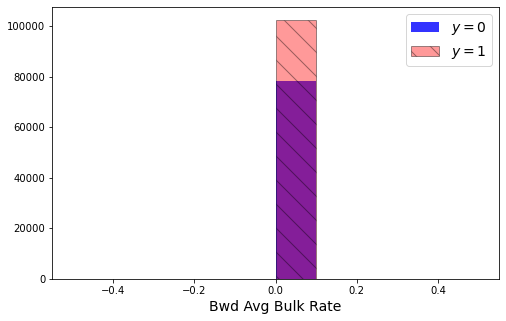

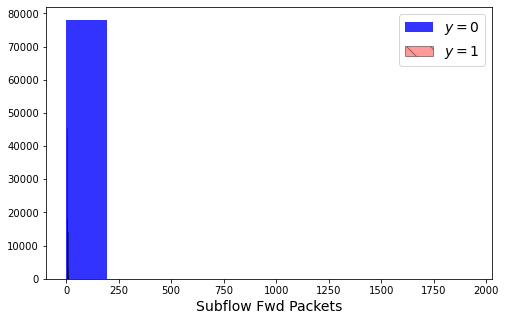

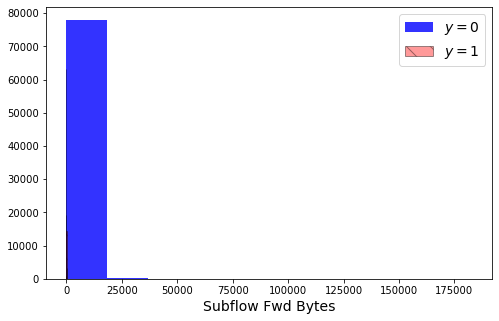

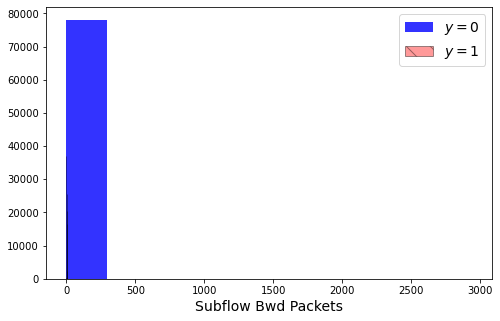

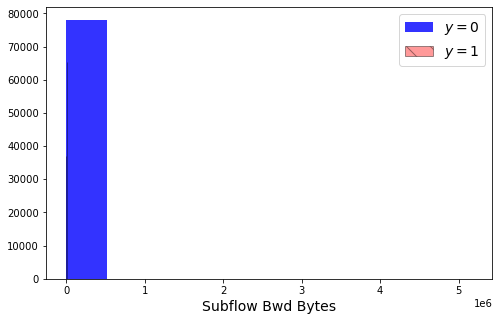

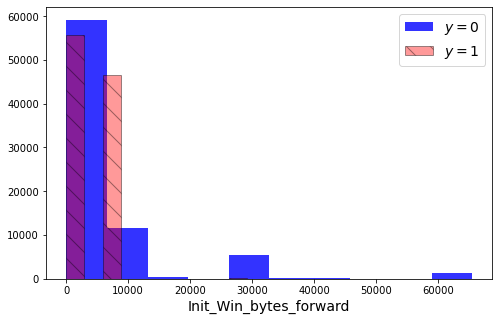

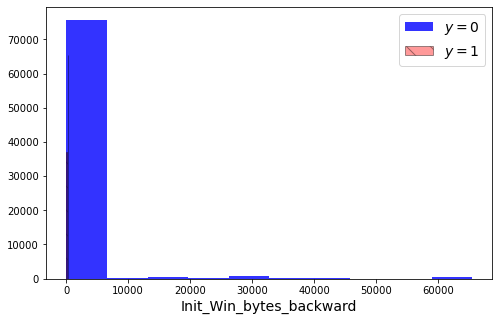

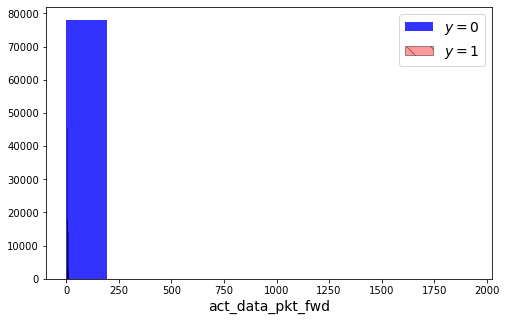

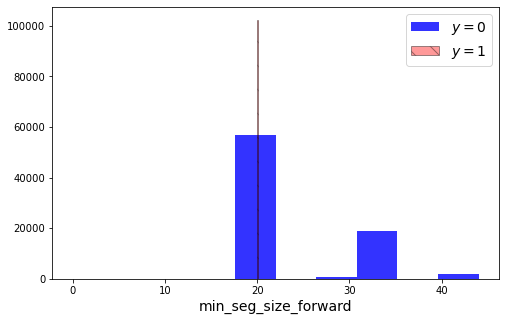

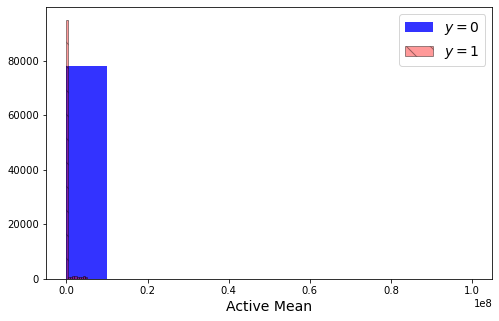

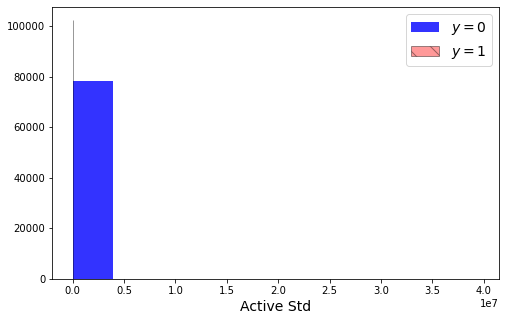

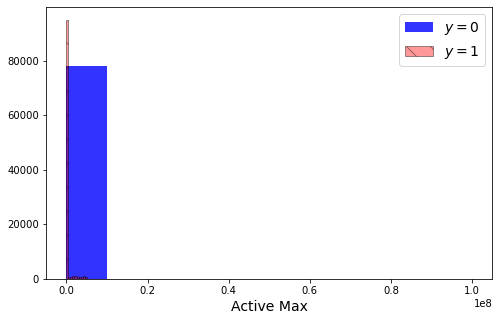

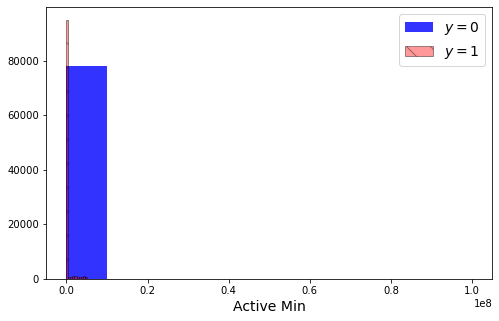

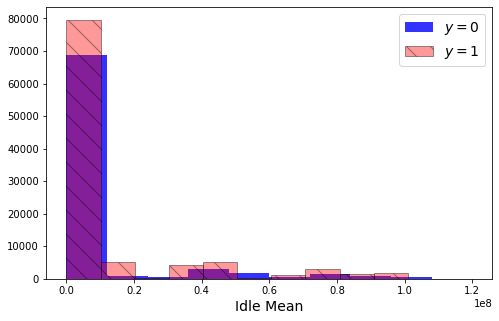

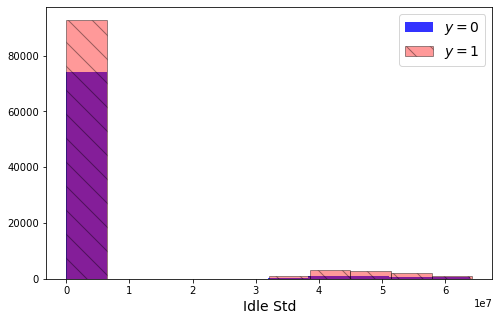

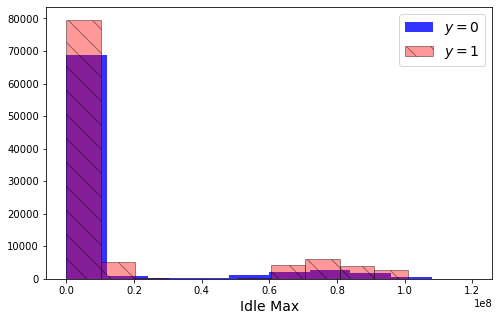

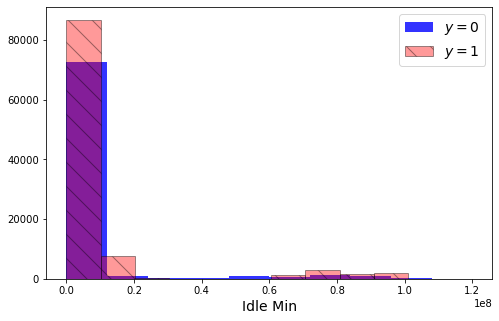

In [14]:
for col in clean_ddos_train.columns[:-2]:
    plt.figure(figsize=(8,5))


    plt.hist(clean_ddos_train.loc[clean_ddos_train.y==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(clean_ddos_train.loc[clean_ddos_train.y==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

These features seem like they maybe useful for classifying:
1. Bwd Packet Length Max
2. Bwd Packet Length Mean
3. Bwd Packet Length Std
4. Avg Bwd Segment Size

I want to plot the pairplot of the features above in order to discern the possible colinearity any pair of variables

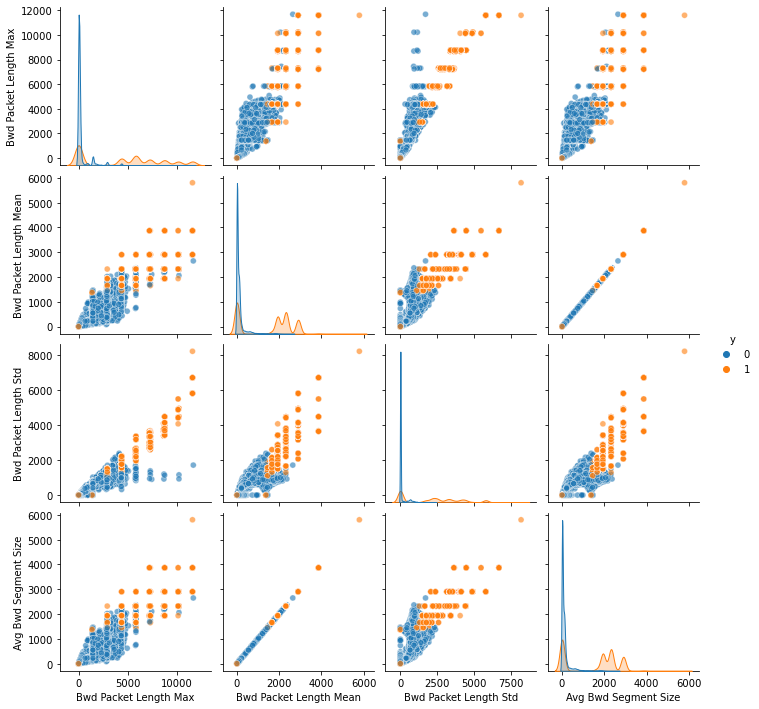

In [15]:
sns.pairplot(data = clean_ddos_train,
                x_vars = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 
                              'Bwd Packet Length Std', 'Avg Bwd Segment Size'],
                y_vars = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 
                              'Bwd Packet Length Std', 'Avg Bwd Segment Size'],
                hue = 'y',
                plot_kws = {'alpha':.6})

plt.show()

#### 5. Initial modelling attempts

Baseline model for this dataset: random coin flip whose probability for head is the probability of drawing the more present class

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
random_accs = []

for i in range(1000):
    draw = np.random.binomial(n=1,
                                 p=clean_ddos_train.y.sum()/len(clean_ddos_train),
                                 size=len(clean_ddos_train))
    
    random_accs.append(accuracy_score(clean_ddos_train.y.values, draw))

In [13]:
np.mean(random_accs)

0.5090256468477249

#### Majority Class

In [19]:
clean_ddos_train.y.value_counts(normalize = True)

1    0.56721
0    0.43279
Name: y, dtype: float64

#### 6. Let's fit Logistic models regressing y on each of the features we identified from the EDA, and then on all the features taking together

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [15]:
n_splits = 5 # 5 folds validation

kfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=498)

In [22]:
features = ['Bwd Packet Length Max', 'Bwd Packet Length Mean', 
                              'Bwd Packet Length Std', 'Avg Bwd Segment Size']

log_reg_accs = np.zeros((n_splits, len(features)))

i = 0
for train_index, test_index in kfold.split(clean_ddos_train, clean_ddos_train.y):
    ddos_tt = clean_ddos_train.iloc[train_index]
    ddos_ho = clean_ddos_train.iloc[test_index]
    
    j = 0
    for feature in features:
        log_reg = LogisticRegression(penalty='none')
        
        log_reg.fit(ddos_tt[feature].values.reshape(-1,1),
                       ddos_tt.y.values)
        
        pred = log_reg.predict(ddos_ho[feature].values.reshape(-1,1))
        
        log_reg_accs[i,j] = accuracy_score(ddos_ho.y.values,
                                              pred)
        
        j = j + 1
    i = i + 1

In [23]:
np.mean(log_reg_accs, axis=0)

array([0.75079194, 0.76417749, 0.75188848, 0.76417749])

In [24]:
full_log_accs = np.zeros(n_splits)

i = 0
for train_index, test_index in kfold.split(clean_ddos_train, clean_ddos_train.y):
    ddos_tt = clean_ddos_train.iloc[train_index]
    ddos_ho = clean_ddos_train.iloc[test_index]
    
    log_reg = LogisticRegression(penalty='none',
                                     max_iter = 1000)
        
    log_reg.fit(ddos_tt[features].values,
                   ddos_tt.y.values)
        
    pred = log_reg.predict(ddos_ho[features].values)
    
    full_log_accs[i] = accuracy_score(ddos_ho.y.values,
                                              pred)
    
    i = i + 1

In [25]:
np.mean(full_log_accs)

0.7631363296235479

#### 7. PCA Decomposition

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
sns.set_style("whitegrid")

I want to run the training data through PCA with only two components and color each point based on its class.

In [22]:
features = clean_ddos_train.columns[:-2]

pca = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(2))])

fit = pca.fit_transform(clean_ddos_train[features])

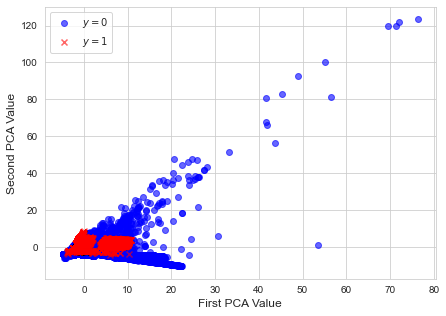

In [29]:
plt.figure(figsize=(7,5))

plt.scatter(fit[clean_ddos_train.y==0, 0], 
            fit[clean_ddos_train.y==0, 1],
            color = 'b',
            label="$y=0$",
            alpha=.6)

plt.scatter(fit[clean_ddos_train.y==1, 0], 
            fit[clean_ddos_train.y==1, 1],
            color='r',
            marker='x',
            label="$y=1$",
            alpha=.6)

plt.legend(fontsize=10)

plt.xlabel("First PCA Value", fontsize=12)
plt.ylabel("Second PCA Value", fontsize=12)

plt.show()

#### 8. Machine Learning Models

### a. Cross-validation with $k$ nearest neighbors
I want to run 5-fold cross-validation below to find the optimal value of $k$ for a $k$ nearest neighbors model fit on the first and second PCA values.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [19]:
n_splits=5
kfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=2013)

In [32]:
ks = range(1, 51)

pca_2_accs = np.zeros((n_splits, len(ks)))

i = 0
for train_index, test_index in kfold.split(clean_ddos_train, clean_ddos_train.y):
    print("CV Split", i)
    ddos_tt = clean_ddos_train.iloc[train_index]
    ddos_ho = clean_ddos_train.iloc[test_index]
    
    ## Note, putting the PCA here speeds up the loop
    pca_pipe = Pipeline([('scale', StandardScaler()),
                               ('pca', PCA(2))])
    
    
    pca_tt = pca_pipe.fit_transform(ddos_tt[features].values)
    pca_ho = pca_pipe.transform(ddos_ho[features].values)
    
    j = 0
    for k in ks:
        knn = KNeighborsClassifier(k)
        
        knn.fit(pca_tt, ddos_tt.y.values)
        
        pred = knn.predict(pca_ho)
        
        pca_2_accs[i,j] = accuracy_score(ddos_ho.y.values, pred)
        
        j = j + 1
    i = i + 1

CV Split 0
CV Split 1
CV Split 2
CV Split 3
CV Split 4


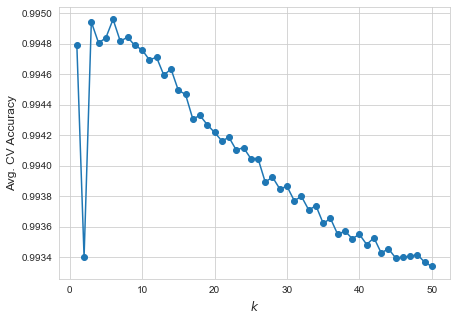

In [33]:
plt.figure(figsize=(7,5))


plt.plot(ks, 
         np.mean(pca_2_accs, axis=0),
         '-o')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)

plt.show()

## b. Finding the optimal number of PCA 

In [34]:
ks = range(1, 51)
comps = range(2,6)

pca_accs = np.zeros((n_splits, len(comps), len(ks)))

i = 0
for train_index, test_index in kfold.split(clean_ddos_train, clean_ddos_train.y):
    print("CV Split", i)
    ddos_tt = clean_ddos_train.iloc[train_index]
    ddos_ho = clean_ddos_train.iloc[test_index]
    
    j = 0
    for n_comps in comps:
        pca_pipe = Pipeline([('scale', StandardScaler()),
                               ('pca', PCA(n_comps))])
    
    
        pca_tt = pca_pipe.fit_transform(ddos_tt[features].values)
        pca_ho = pca_pipe.transform(ddos_ho[features].values)
        
        k = 0
        for neighbors in ks:
            knn = KNeighborsClassifier(neighbors)
            
            knn.fit(pca_tt,
                    ddos_tt.y.values)

            pred = knn.predict(pca_ho)

            pca_accs[i,j,k] = accuracy_score(ddos_ho.y.values, pred)
            
            k = k + 1
        j = j + 1
    i = i + 1

CV Split 0
CV Split 1
CV Split 2
CV Split 3
CV Split 4


In [35]:
max_index = np.unravel_index(np.argmax(np.mean(pca_accs, axis=0), axis=None), 
                                       np.mean(pca_accs, axis=0).shape)


print("The pair with the highest AVG CV Accuracy was",
         "k =", ks[max_index[1]],
         "and number of components =", np.round(comps[max_index[0]],2))
print("The highest AVG CV Accuracy was", np.max(np.mean(pca_accs, axis=0)))

The pair with the highest AVG CV Accuracy was k = 1 and number of components = 5
The highest AVG CV Accuracy was 0.9997895531501799


## c. SVM model

In [20]:
from sklearn.svm import SVC

In [24]:
Cs = [.01, .1, 1, 10, 25, 50, 75, 100, 125, 150]

## this will hold the CV accuracies
C_accs1 = np.zeros((n_splits, len(Cs)))


## the cross-validation
i = 0
for train_index, test_index in kfold.split(clean_ddos_train, clean_ddos_train.y):
    ddos_tt = clean_ddos_train.iloc[train_index]
    ddos_ho = clean_ddos_train.iloc[test_index]
    
    j = 0
    for C in Cs:
        pipe = Pipeline([('scale', StandardScaler()),
                            ('svm', SVC(C=C))])
    
        pipe.fit(ddos_tt[features],
                    ddos_tt.y)
    
        pred = pipe.predict(ddos_ho[features])

        C_accs1[i, j] = accuracy_score(ddos_ho.y, pred)
        
        j = j + 1
    i = i + 1

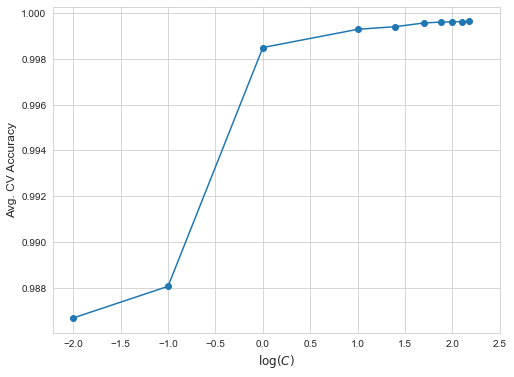

In [25]:
plt.figure(figsize = (8,6))

plt.plot(np.log10(np.array(Cs)), 
         np.mean(C_accs1, axis=0), 
         '-o')

plt.xlabel("$\log(C)$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)
plt.xticks(np.arange(-2,3,.5),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## d. Random Forest model

In [26]:
## first import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
max_depths = range(1, 11)
n_trees = [100, 500]

In [29]:
## This will also take about two minutes
grid_cv = GridSearchCV(RandomForestClassifier(), # first put the model object here
                          param_grid = {'max_depth':max_depths, # place the grid values for max_depth and
                                        'n_estimators':n_trees}, # and n_estimators here
                          scoring = 'accuracy', # put the metric we are trying to optimize here as a string, "accuracy"
                          cv = 5) # put the number of cv splits here

## you fit it just like a model
grid_cv.fit(clean_ddos_train[features], clean_ddos_train.y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='accuracy')

In [30]:
## You can find the hyperparameter grid point that
## gave the best performance like so
## .best_params_
grid_cv.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [31]:
## You can find the best score like so
## .best_score_
grid_cv.best_score_

0.9997674012295444

In [42]:
(pd.DataFrame({'feature_importance_score':grid_cv.best_estimator_.feature_importances_},
                 index=features).sort_values('feature_importance_score',
                                                ascending=False)).head(10)

,feature_importance_score
Fwd Packet Length Max,0.126056
Fwd Packet Length Mean,0.090432
Avg Fwd Segment Size,0.078203
Total Length of Fwd Packets,0.069720
act_data_pkt_fwd,0.055592
Fwd IAT Total,0.046403
Subflow Fwd Packets,0.046064
Subflow Fwd Bytes,0.044213
Fwd IAT Max,0.038387
Fwd IAT Std,0.037523


## Final model selection: Random Forest Classifier

In [35]:
model = grid_cv.best_estimator_

model.fit(clean_ddos_train[features], clean_ddos_train.y)

RandomForestClassifier(max_depth=10)

Training the model on the entire test set

In [36]:
accuracy_score(model.predict(clean_ddos_train[features]), clean_ddos_train.y)

0.999867086083913

In [37]:
accuracy_score(model.predict(clean_ddos_test[features]), clean_ddos_test.y)

0.9998006335422989